## Nonparametric Fitting

Not every distribution has a closed form, in which case we have to resort to **nonparametric** solution. What we want to know is $p(\boldsymbol{x})$. If we divide $\boldsymbol{x}$ into bins of width $\Delta_i$ and count the number $n_i$ of observation of $\boldsymbol{x}$ falling in the bin $i$:
$$
p_i = \frac{n_i}{N\Delta_i}
$$

There are several ways to simulate in this nonparametric form:
1. Fix $\Delta_i$ to be a constant as $\Delta$, then trt to determing $n_i$, the number of observations inside $\Delta$. This is basically simulate a histogram, then the hyperparameter is $\delta$.
2. Define a kernel function in a Guassian form with each observation $\boldsymbol{x}_n$ as the expectation value:
$$
p(\boldsymbol{x}) = \frac{1}{N}\sum_{i=1}^N\frac{1}{(2\pi h^2)^{1/2}}\exp({-\frac{||\boldsymbol{x}-\boldsymbol{x}_n||}{2h^2}})
$$
Then the hyperparameter is h
3. Fix $n_i$ to be a constant as $k$, then try to determing $\Delta_i$ where $k$ number of observations are included. This is so-called "K-nearest neighbors" and the hyperparameter is $k$.

With the hyperparameters tuning, usually the fitting curve can change between "kinky" to "smooth" as shows below.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def func(x):
    return 0.7/((2*math.pi)**0.5)*math.exp(-((x-1)**2)/2) + 0.3/((2*math.pi)**0.5)*math.exp(-((x-5)**2)/2)

def sampling(size = 2000, begin = -2, end = 8):
    data = []
    X = np.arange(begin,end,0.1)
    Y = [func(x) for x in X]
    xx=np.random.uniform(begin,end, size)
    yy=np.random.uniform(0,max(Y), size)
    for i in range(size):
        if yy[i]<func(xx[i]):
            data.append(xx[i])
    return X, Y, data

def histogram(X, Y, data):
    fig, axes = plt.subplots(1, 3, figsize = (20,5))
    bins_array = [3, 20, 100]
    for i in range(3):
        axes[i].hist(data, bins = bins_array[i], density = True)
        axes[i].plot(X, Y, linestyle = "dashed")
        axes[i].set_title("Bin width is {}".format(bins_array[i]), fontsize = 15)


def kernel(X, Y, data):       
    def kernel_func(data, X, h):
        N = len(data)
        kernel_X = X.copy()
        kernel_Y = [0]*len(X)
        for center in data:
            for i in range(len(X)):            
                kernel_Y[i] += 1/(2*math.pi*h*h)**0.5*math.exp(-(kernel_X[i]-center)**2/(2*h*h))
        return [each/N for each in kernel_Y]
    
    h_array = [1,0.1,0.01]
    fig, axes = plt.subplots(1, 3, figsize = (20,5))
    for i in range(len(h_array)):
        h = h_array[i]
        kernel_Y = kernel_func(data, X, h)
        axes[i].plot(X, kernel_Y)
        axes[i].plot(X, Y, linestyle = "dashed")
        axes[i].set_title("Hypercube side (h) is {}".format(h_array[i]), fontsize = 15)  
        
def K_nearest(X, Y, data):
    def K_nearest_func(data, X, k):
        N = len(X)
        Knearest_Y = np.zeros(N)  
        for i in range(N):
            tmp = []
            for d in data:
                tmp.append((X[i]-d)**2)
            tmp = sorted(tmp)
            Knearest_Y[i] = 1/tmp[k]**0.5
        return Knearest_Y
    
    k_array = [500,20,1]
    fig, axes = plt.subplots(1, 3, figsize = (20,5))
    for i in range(len(k_array)):
        k = k_array[i]
        K_nearest_Y = K_nearest_func(data, X, k)
        K_nearest_Y /= np.max(K_nearest_Y) /0.3
        axes[i].plot(X, K_nearest_Y)
        axes[i].plot(X, Y, linestyle = "dashed")
        axes[i].set_title("The nearest neighbor number is {}".format(k_array[i]), fontsize = 15)  

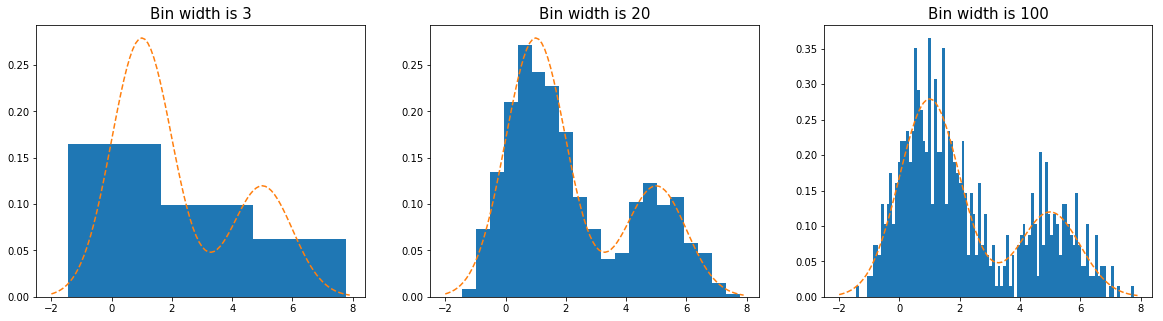

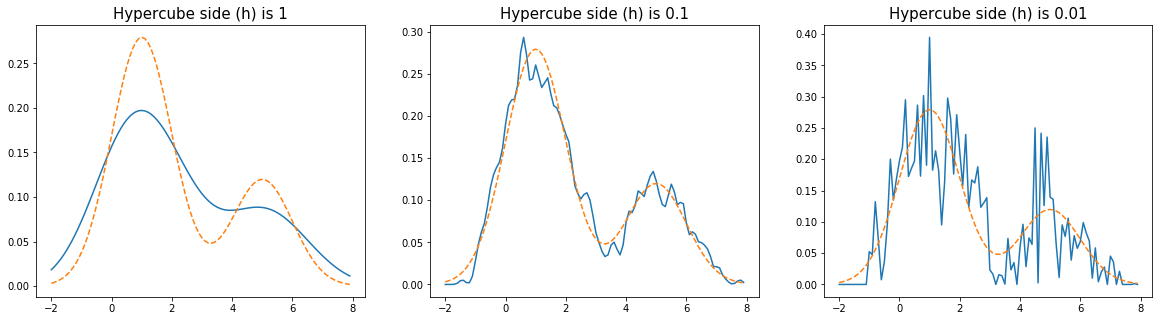

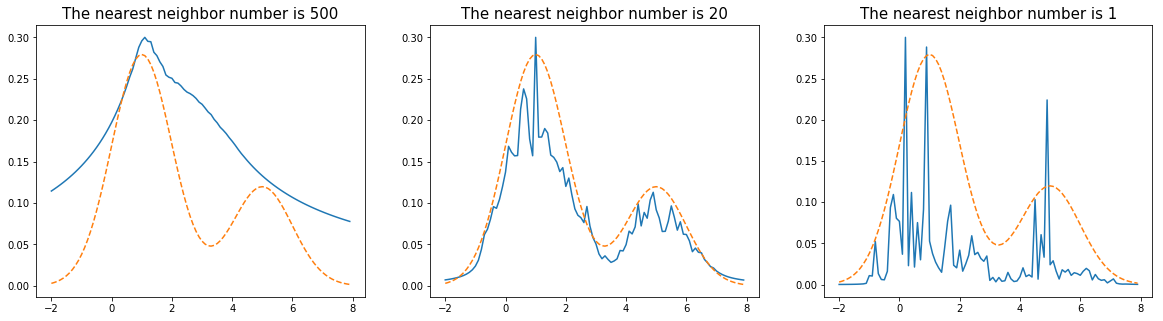

In [2]:
X, Y, data = sampling()
histogram(X, Y, data)
kernel(X, Y, data)
K_nearest(X, Y, data)